# Homework  
Data documentation: https://tidyr.tidyverse.org/reference/who.html

__Directions:__ Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions. 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/who.csv')

In [17]:
df.head()

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

## Question 1. We need to know what's included in this data.
- How many countries are present?  
- What's the timespan of the data?  
- Does each country have a row for every year present?  
- Which countries are missing years?  
- How many rows have at least 1 non-null values across the columns 3-57?

In [19]:
#nunique() is used to determine the number of unique values in the "country" column.
print("the total number of countries present are :",df["country"].nunique())

the total number of countries present are : 219


In [20]:
#MAX helps in finding the large value and min for the minimum value
print(df["year"].max() - df["year"].min())

33


In [21]:
# we are doing groupby for the country and unique values for the year
df_grouped = df.groupby(by="country")["year"].nunique()
# the groupby data is being converted into dictionary
df_grouped_dict = df_grouped.to_dict()
count = 0
list_ = []
#itirating over the keys for finding value which is not equal to 34
for val in df_grouped_dict.keys():
    if df_grouped_dict[val] != 34:
        list_.append(val)
    else:
        count = count+1
if len(df_grouped_dict)!= count:
    print("Each country doesn't have a row for each year present")
else:
    print("each country have a row for every year present")

Each country doesn't have a row for each year present


In [22]:
print("The below list of countries doesn't have a row for each year present")
print(list_)

The below list of countries doesn't have a row for each year present
['Bonaire, Saint Eustatius and Saba', 'Curacao', 'Montenegro', 'Netherlands Antilles', 'Serbia', 'Serbia & Montenegro', 'Sint Maarten (Dutch part)', 'South Sudan', 'Timor-Leste']


In [23]:
#using iloc for slicing the dataframe
df1 = df.iloc[:,3:58]
#and we are counting the values through axis 1 and converting into dict
df1_grouped_dict = df1.count(axis=1).to_dict()
df1_grouped_dict
count = 0
for val in df1_grouped_dict.values():
    if val!=0:
        count= count+1
print("The number of rows having at least 1 non-null values across the columns 3-57")
print(count)

The number of rows having at least 1 non-null values across the columns 3-57
3484


## Question 2: Wide data isn't usually helpful.
Convert this to a long format with the following columns:  
1. country  
2. year  
3. diagnosis method: mapping should be: 

```
  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
 ```

4. gender: male or female.   
5. age: lower_age - higher_age, e.g., 0-14  
6. number of cases  

__Note__: You can use `replace` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

In [24]:
#Reshape the DataFrame using the 'melt' function
df2 = pd.melt(df,id_vars = ["country","year"],value_name='Number_of_cases')
#Define a function to categorize diagnosis methods
def categorize_value(x):
        if "new_sp" in x:
            return"Pulmonary Smear (+)"
        elif "new_sn" in x:
            return "Pulmonary Smear (-)"
        elif "new_ep" in x:
            return "Extrapulmonary"
        elif "newrel" in x:
            return "Relapse"
#Define a function to categorize gender
def categorizeinto_gender(x):
    if "m" in x:
        return "Male"
    elif "f" in x:
        return "Female"
#Define a function to categorize age
def categorizeinto_Age(x):
    str_update = x[8:]#Extract the part of the string after the 8th character
    if str_update == "014":
        return("0-14")
    elif str_update == "65":
        return("65-") 
    else:
        return(str_update[:2] + "-" +str_update[2:])
# Step 5: Apply the categorization functions to create new columns
df2['Diagnosis_method'] = df2["variable"].apply(categorize_value)
df2['Gender'] = df2["variable"].apply(categorizeinto_gender)
df2["Age"] = df2["variable"].apply(categorizeinto_Age)
df2 = df2.drop('variable', axis=1)
df2 = df2[['country', 'year', 'Diagnosis_method', 'Gender','Age','Number_of_cases']]
df2

,country,year,Diagnosis_method,Gender,Age,Number_of_cases
0,Afghanistan,1980,Pulmonary Smear (+),Male,0-14,NaN
1,Afghanistan,1981,Pulmonary Smear (+),Male,0-14,NaN
2,Afghanistan,1982,Pulmonary Smear (+),Male,0-14,NaN
3,Afghanistan,1983,Pulmonary Smear (+),Male,0-14,NaN
4,Afghanistan,1984,Pulmonary Smear (+),Male,0-14,NaN
...,...,...,...,...,...,...
405435,Zimbabwe,2009,Relapse,Female,65-,NaN
405436,Zimbabwe,2010,Relapse,Female,65-,NaN
405437,Zimbabwe,2011,Relapse,Female,65-,NaN
405438,Zimbabwe,2012,Relapse,Female,65-,NaN


## Question 3: Create a graph that shows when countries started to report TB cases.

In [25]:
#Replace 0 values in the 'Number_of_cases' column with NaN (Not-a-Number)
df2["Number_of_cases"] = df2["Number_of_cases"].replace(0, np.nan)
#Create a new DataFrame 'df3' by dropping rows with NaN values in any column
df3 = df2.dropna()
result = df3.groupby('country')['year'].min().reset_index()
#Rename the columns of the 'result' DataFrame
result.columns = ['Country', 'MinYear']
result

,Country,MinYear
0,Afghanistan,1997
1,Albania,1995
2,Algeria,1997
3,American Samoa,1997
4,Andorra,1996
...,...,...
212,Wallis and Futuna Islands,1996
213,West Bank and Gaza Strip,1995
214,Yemen,1995
215,Zambia,1995


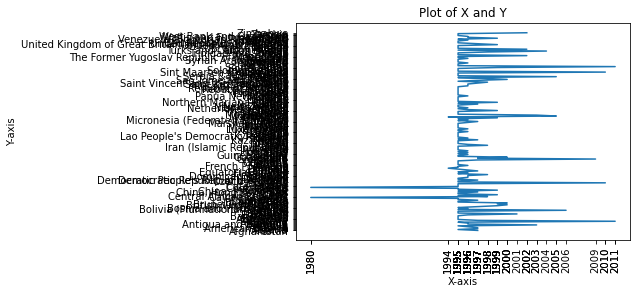

In [38]:
y = result['Country'].tolist()
x = result['MinYear'].tolist()
plt.plot(x,y)

plt.xticks(x, rotation=90)
# Add labels and a title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of X and Y')
# Show the plot
plt.show()



<ipython-input-42-98c279cfcd98>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(x[:27], rotation=90)
<ipython-input-42-98c279cfcd98>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(x[27:54], rotation=90)
<ipython-input-42-98c279cfcd98>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(x[54:81], rotation=90)
<ipython-input-42-98c279cfcd98>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels(x[81:108], rotation=90)
<ipython-input-42-98c279cfcd98>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2, 0].set_xticklabels(x[108:135], rotation=90)
<ipython-input-42-98c279cfcd98>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2, 1].set_xticklabels(x[135:162], rotation=90)
<ipython-input-42-98c279c

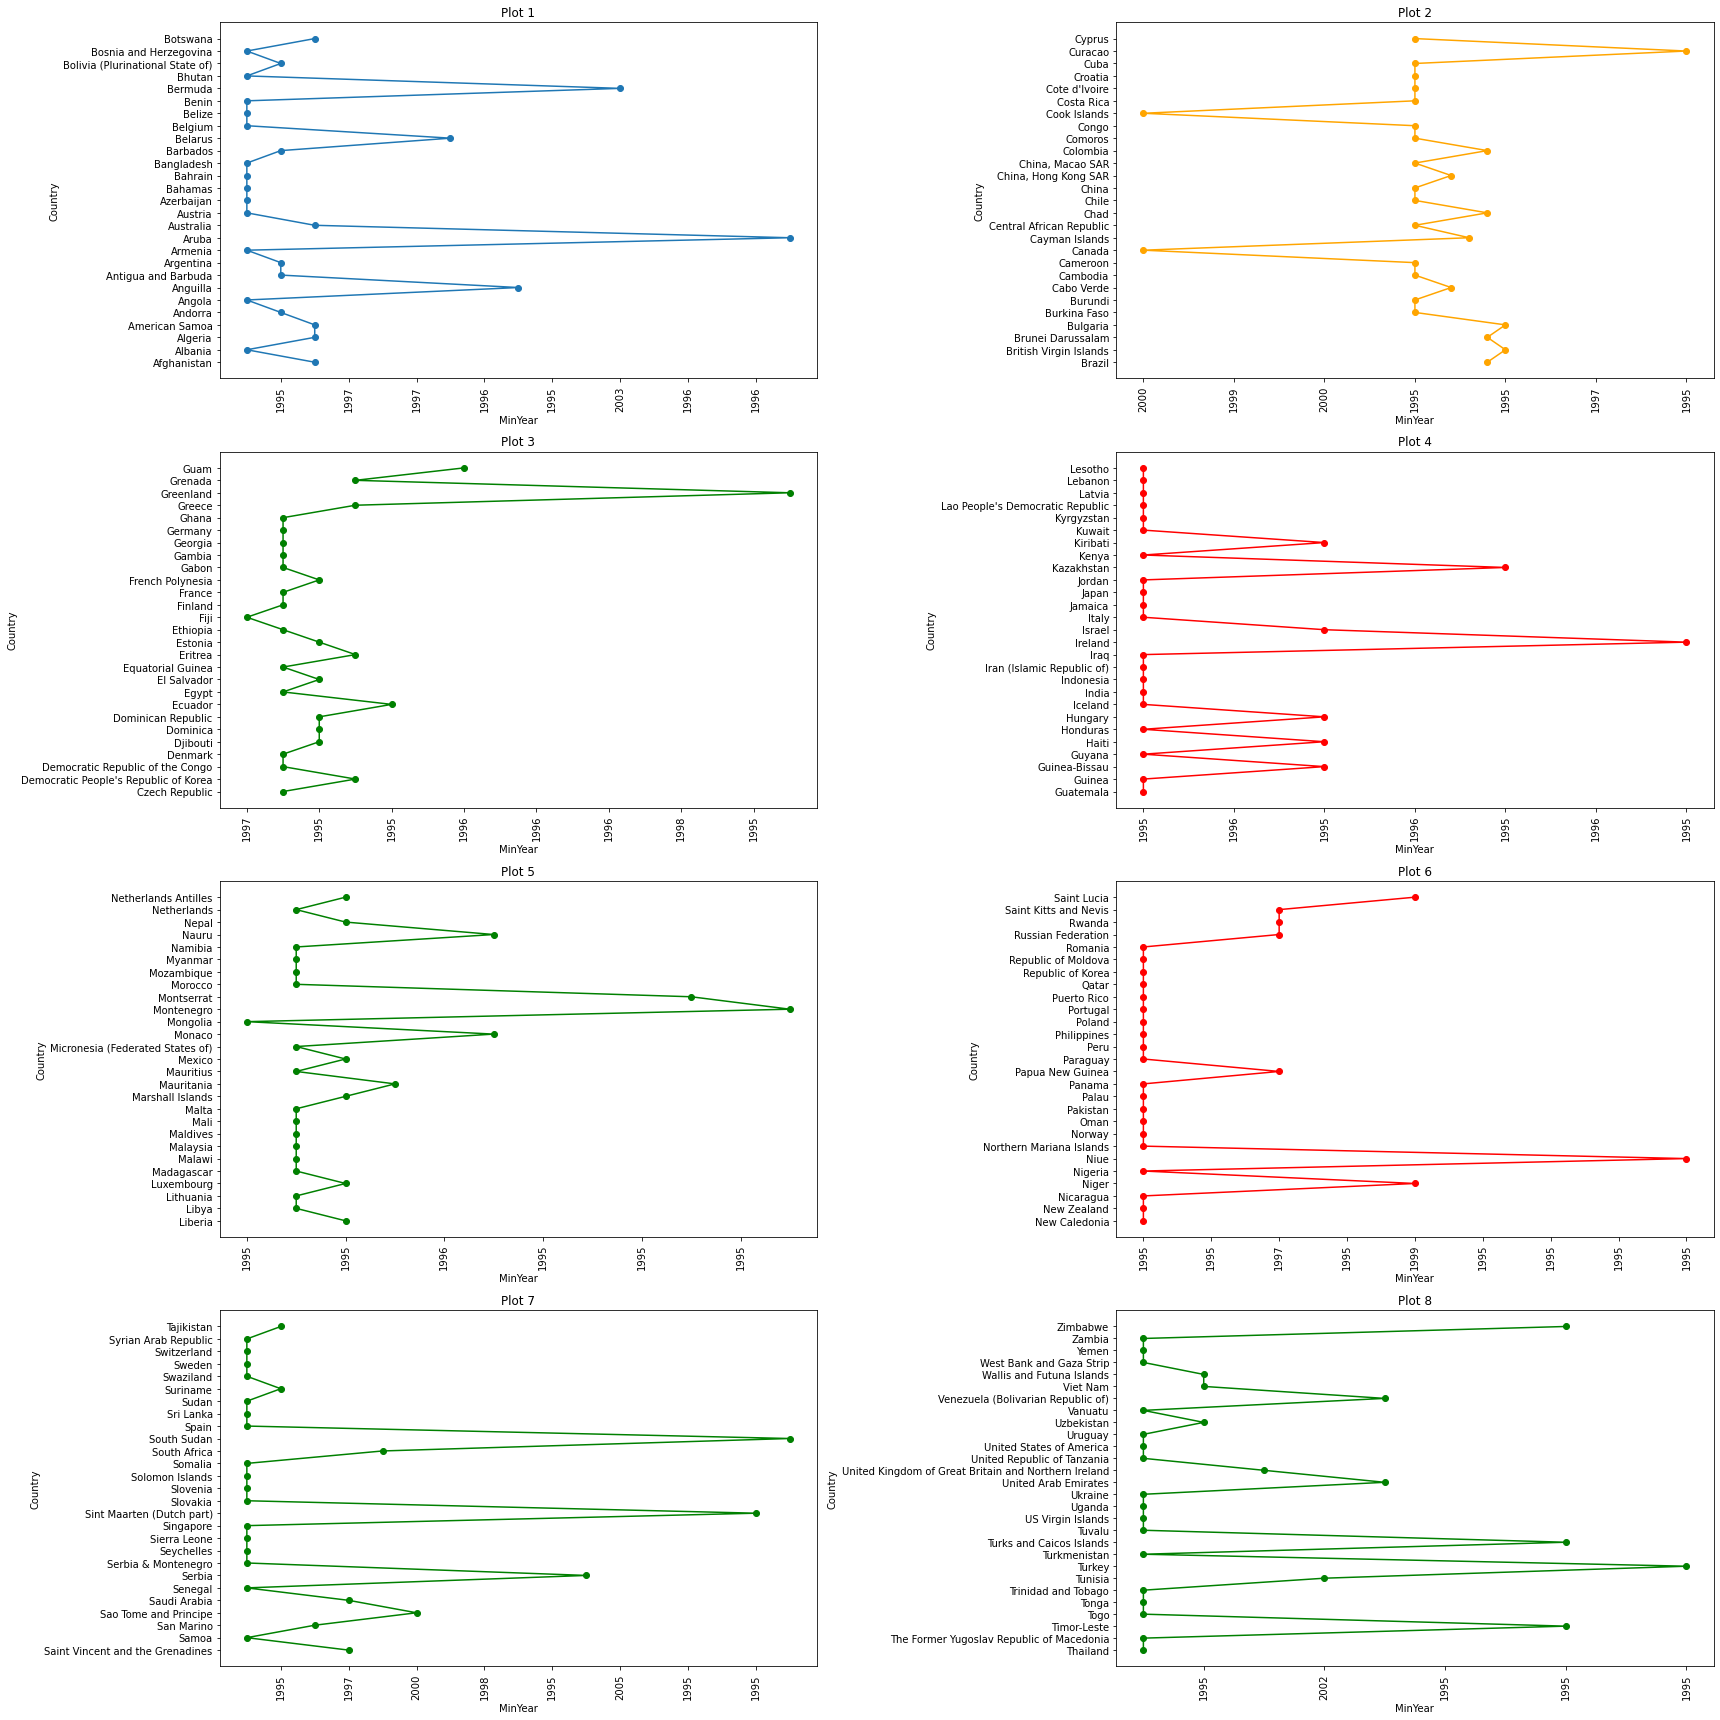

In [42]:
###############


# Because we cant see the names on x-axis i divided the graph into size of 4*2 grid below


#################

import matplotlib.pyplot as plt
import pandas as pd

# Create a 4x2 grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(24, 24))
   
axs[0, 0].plot(x[:27],y[:27], marker='o', linestyle='-')
axs[0, 0].set_xticklabels(x[:27], rotation=90)
axs[0, 0].set_xlabel('MinYear')
axs[0, 0].set_ylabel('Country')
axs[0, 0].set_title('Plot 1')


axs[0, 1].plot(x[27:54],y[27:54], marker='o', linestyle='-', color='orange')
axs[0, 1].set_xticklabels(x[27:54], rotation=90)
axs[0, 1].set_xlabel('MinYear')
axs[0, 1].set_ylabel('Country')
axs[0, 1].set_title('Plot 2')


axs[1, 0].plot(x[54:81],y[54:81], marker='o', linestyle='-', color='green')
axs[1, 0].set_xticklabels(x[54:81], rotation=90)
axs[1, 0].set_xlabel('MinYear')
axs[1, 0].set_ylabel('Country')
axs[1, 0].set_title('Plot 3')

axs[1, 1].plot(x[81:108],y[81:108], marker='o', linestyle='-', color='red')
axs[1, 1].set_xticklabels(x[81:108], rotation=90)
axs[1, 1].set_xlabel('MinYear')
axs[1, 1].set_ylabel('Country')
axs[1, 1].set_title('Plot 4')

axs[2, 0].plot(x[108:135],y[108:135], marker='o', linestyle='-', color='green')
axs[2, 0].set_xticklabels(x[108:135], rotation=90)
axs[2, 0].set_xlabel('MinYear')
axs[2, 0].set_ylabel('Country')
axs[2, 0].set_title('Plot 5')

axs[2, 1].plot(x[135:162],y[135:162], marker='o', linestyle='-', color='red')
axs[2, 1].set_xticklabels(x[135:162], rotation=90)
axs[2, 1].set_xlabel('MinYear')
axs[2, 1].set_ylabel('Country')
axs[2, 1].set_title('Plot 6')

axs[3, 0].plot(x[162:189],y[162:189], marker='o', linestyle='-', color='green')
axs[3, 0].set_xticklabels(x[162:189], rotation=90)
axs[3, 0].set_xlabel('MinYear')
axs[3, 0].set_ylabel('Country')
axs[3, 0].set_title('Plot 7')

axs[3, 1].plot(x[189:],y[189:], marker='o', linestyle='-', color='green')
axs[3, 1].set_xticklabels(x[189:], rotation=90)
axs[3, 1].set_xlabel('MinYear')
axs[3, 1].set_ylabel('Country')
axs[3, 1].set_title('Plot 8')

plt.subplots_adjust(hspace=2, wspace=.2)

plt.tight_layout()

plt.show()
